<a href="https://colab.research.google.com/github/hoelzl/ML-Course/blob/master/notebooks/nb030_solution_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
f_mnist = fetch_openml(data_id=40996)

In [ ]:
type(f_mnist)

sklearn.utils.Bunch

In [ ]:
f_mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
f_mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
f_mnist.data.shape

(70000, 784)

In [ ]:
f_mnist.target

array(['9', '0', '0', ..., '8', '1', '5'], dtype=object)

In [ ]:
f_mnist.target_names

['class']

In [ ]:
f_mnist.DESCR

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [ ]:
print(f_mnist.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [ ]:
x, y = f_mnist.data, f_mnist.target

In [ ]:
import matplotlib.pyplot as plt

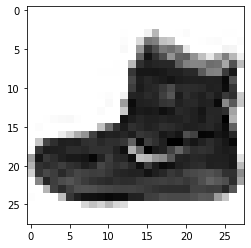

In [ ]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")

In [ ]:
import numpy as np

In [ ]:
y = y.astype(np.int32)

In [ ]:
x_train, x_test = x[:60_000], x[60_000:]
y_train, y_test = y[:60_000], y[60_000:]

In [ ]:
def show_item(index):
  image = x[index].reshape(28, 28)
  label = y[index]
  plt.imshow(image, cmap="binary")
  plt.show()
  print("Item =", index, "label =", label)

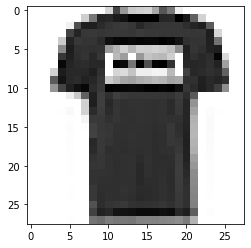

Item = 1 label = 0


In [ ]:
show_item(1)

In [ ]:
def show_items_with_label(label, num_items=3):
  items_shown = 0
  for i in range(len(y)):
    if y[i] == label:
      items_shown += 1
      show_item(i)
    if items_shown >= num_items:
      break

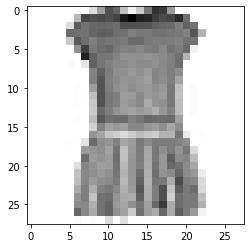

Item = 3 label = 3


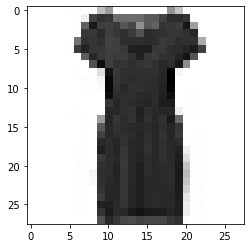

Item = 20 label = 3


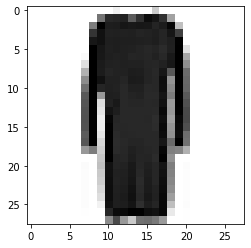

Item = 25 label = 3


In [ ]:
show_items_with_label(3)

In [ ]:
def show_all_item_kinds():
  for label in range(10):
    show_items_with_label(label)


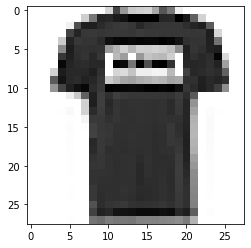

Item = 1 label = 0


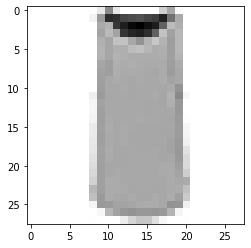

Item = 2 label = 0


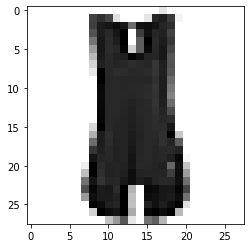

Item = 4 label = 0


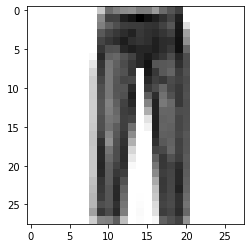

Item = 16 label = 1


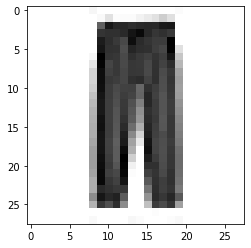

Item = 21 label = 1


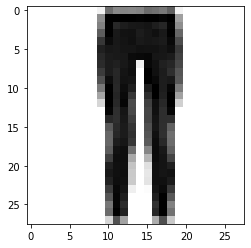

Item = 38 label = 1


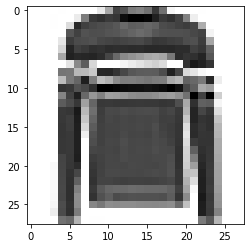

Item = 5 label = 2


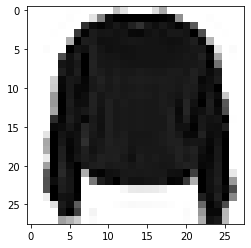

Item = 7 label = 2


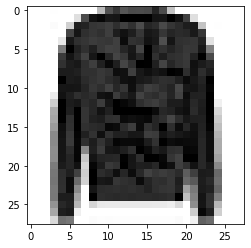

Item = 27 label = 2


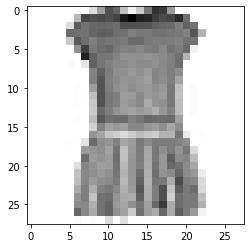

Item = 3 label = 3


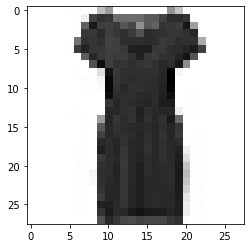

Item = 20 label = 3


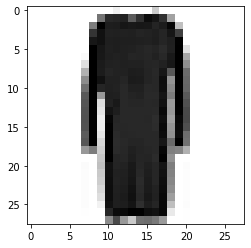

Item = 25 label = 3


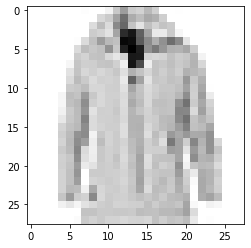

Item = 19 label = 4


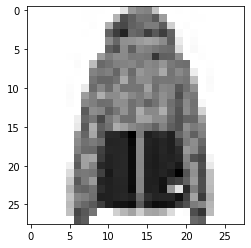

Item = 22 label = 4


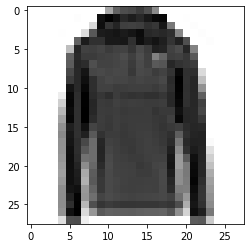

Item = 24 label = 4


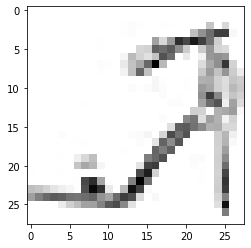

Item = 8 label = 5


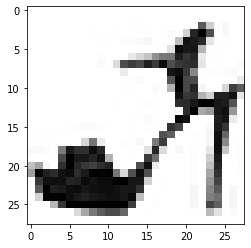

Item = 9 label = 5


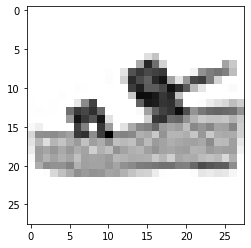

Item = 12 label = 5


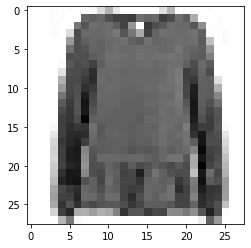

Item = 18 label = 6


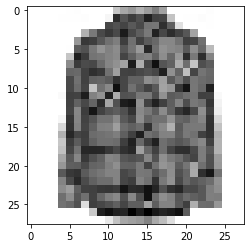

Item = 32 label = 6


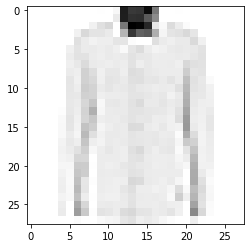

Item = 33 label = 6


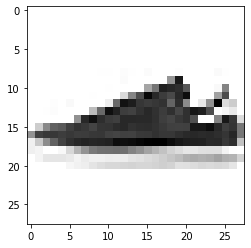

Item = 6 label = 7


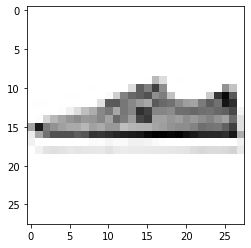

Item = 14 label = 7


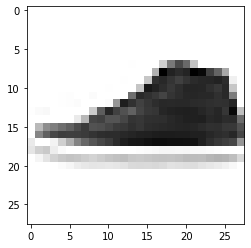

Item = 41 label = 7


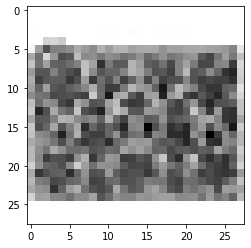

Item = 23 label = 8


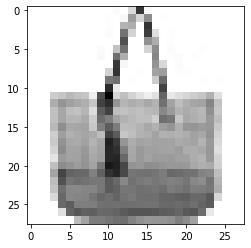

Item = 35 label = 8


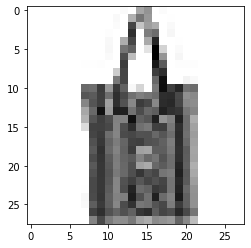

Item = 57 label = 8


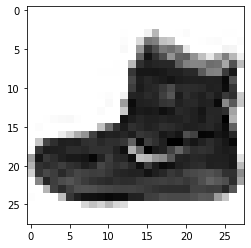

Item = 0 label = 9


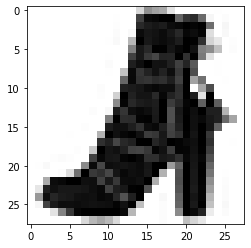

Item = 11 label = 9


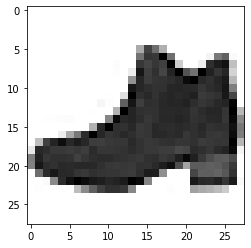

Item = 15 label = 9


In [ ]:
show_all_item_kinds()

In [ ]:
trousers_train = y_train == 1
trousers_test = y_test == 1

In [ ]:
trousers_test[:6]

array([False, False,  True,  True, False,  True])

In [ ]:
y_test[:6]

array([9, 2, 1, 1, 6, 1], dtype=int32)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(x_train, trousers_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
trousers_predict = sgd_clf.predict(x_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [ ]:
def print_scores(predictions):
    print(f"Accuracy:          {accuracy_score(trousers_test, predictions) * 100:.1f}%")
    print(f"Balanced Accuracy: {balanced_accuracy_score(trousers_test, predictions) * 100:.1f}%")
    print(f"Precision:         {precision_score(trousers_test, predictions, zero_division=0) * 100:.1f}%")
    print(f"Recall:            {recall_score(trousers_test, predictions, zero_division=0) * 100:.1f}%")
    print(f"F1:                {f1_score(trousers_test, predictions, zero_division=0) * 100:.1f}%")

In [ ]:
print_scores(trousers_predict)

Accuracy:          99.0%
Balanced Accuracy: 97.6%
Precision:         94.0%
Recall:            95.8%
F1:                94.9%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(x_train, trousers_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
trousers_predict_dt = dt_clf.predict(x_test)

In [ ]:
print_scores(trousers_predict_dt)

Accuracy:          98.9%
Balanced Accuracy: 96.7%
Precision:         95.2%
Recall:            93.9%
F1:                94.6%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
rf_clf.fit(x_train, trousers_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
trousers_predict_rf = rf_clf.predict(x_test)

In [ ]:
print_scores(trousers_predict_rf)

Accuracy:          99.5%
Balanced Accuracy: 97.4%
Precision:         99.9%
Recall:            94.8%
F1:                97.3%
